In [1]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import requests
import json
from pprint import pprint
import random
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [4]:
pitch_df = pd.read_csv('Resources/pitch_data.csv')
pitch_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0


In [11]:
# separate out balls and strikes
strikes = pitch_df.loc[pitch_df["Called Ball/Strike"] == "Strike"]
# strikes.head()

balls = pitch_df.loc[pitch_df["Called Ball/Strike"] == "Ball"]
# balls.head()

In [12]:
fig_size = [0, 1]
# Set figure width to 12 and height to 8
fig_size[0] = 12
fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size

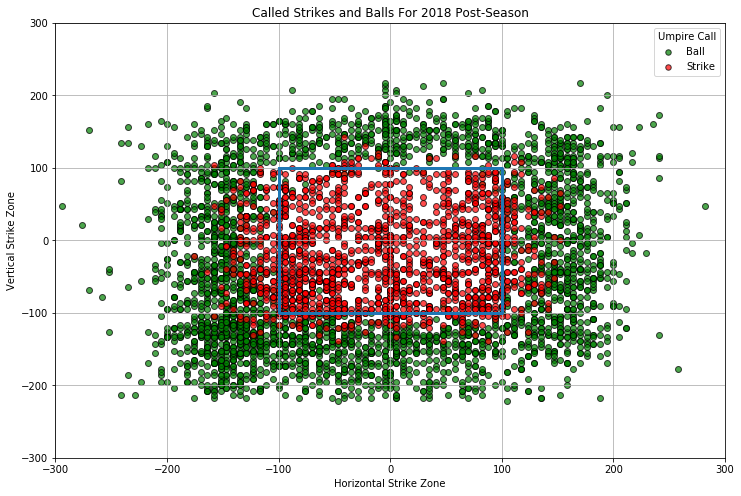

In [18]:
# CHART VALUES
# Chart will be from -300 to 300 for both X and Y
plt.ylim(-300,300)
plt.xlim(-300,300)

# Build the scatter plots for the strikes and balls

x_axis_b = balls["Pitch_X"]
y_axis_b = balls["Pitch_Y"]
x_axis_s = strikes["Pitch_X"]
y_axis_s = strikes["Pitch_Y"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axis_b, y_axis_b, marker="o", facecolors="green",edgecolors="black", alpha=0.7)
temp_plot = plt.scatter(x_axis_s, y_axis_s, marker="o", facecolors="red",edgecolors="black", alpha=0.7)

plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("Called Strikes and Balls For 2018 Post-Season")
plt.xlabel("Horizontal Strike Zone")
plt.ylabel("Vertical Strike Zone")
# We might want to put a note to the side so this is a placeholder
# plt.text(42, 35, "Note: \nThe note goes here.")

# create and size the ledgend
lgnd= plt.legend(["Ball", "Strike"], loc=1, markerscale = .5, title="Umpire Call")
# this part adds the pitch types, and makes all the dots in the legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# adds a box to show the strike zone
x = [-100, -100, 100, 100, -100]
y = [100, -100, -100, 100, 100]
plt.plot(x, y, linewidth = 3)

In [19]:

pitch_df['Theoretical_Call'] = ''
pitch_df['Accurate'] = ''
pitch_df['Strike'] = ''

for i, row in pitch_df.iterrows():
    pitch_x = abs(row['Pitch_X'])
    pitch_y = abs(row['Pitch_Y'])
    if (pitch_x > 100) or (pitch_y > 100):
        pitch_df.loc[i, 'Theoretical_Call'] = 'Ball'
        pitch_df.loc[i, 'Strike'] = False
    else:
        pitch_df.loc[i, 'Theoretical_Call'] = 'Strike'
        pitch_df.loc[i, 'Strike'] = True
    if pitch_df.loc[i, 'Called Ball/Strike'] == pitch_df.loc[i, 'Theoretical_Call']:
        pitch_df.loc[i, 'Accurate'] = True
    else:
        pitch_df.loc[i, 'Accurate'] = False

pitch_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed,Theoretical_Call,Accurate,Strike
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0,Ball,True,False
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0,Strike,True,True
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0,Ball,True,False
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0,Ball,True,False
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0,Ball,True,False


In [50]:
fastball_df = pd.DataFrame(pitch_df.loc[pitch_df["Pitch_Type"] == "FA", :])
fastball_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed,Theoretical_Call,Accurate,Strike
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91,Ball,True,False
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89,Strike,True,True
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90,Ball,True,False
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94,Ball,True,False
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93,Ball,True,False


In [72]:
fastball_df['Accurate'].mean()

# fastball_ump = fastball_df.groupby("Umpire")
# grouped_fastball = pd.DataFrame({'Umpire': fastball_ump['Umpire'],
#                                 'Accurate': fastball_ump['Accurate'] == 'True',
#                                'Inaccurate': fastball_ump['Accurate'] == 'False'})
# grouped_fastball


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [113]:
pitch_types = pitch_df['Pitch_Type'].unique()


for pitch_type in pitch_types:
    pitch_type_df = pitch_df.loc[pitch_df['Pitch_Type'] == pitch_type]
    pitch_type_ump = pitch_type_df.groupby('Umpire')
    accurate_df = pd.DataFrame({"Accurate": pitch_type_ump["Accurate"],
                               "Inaccurate": pitch_type_ump["Accurate"]})
    pitch_right = accurate_df.loc[accurate_df['Accurate'] == 'True']
    pitch_wrong = accurate_df.loc[accurate_df['Accurate']== 'False']
    
#     acc_percent = pitch_right / (pitch_right + pitch_wrong)
    
    

Accurate      0
Inaccurate    0
dtype: int64
Accurate      0
Inaccurate    0
dtype: int64
Accurate      0
Inaccurate    0
dtype: int64
Accurate      0
Inaccurate    0
dtype: int64
Accurate      0
Inaccurate    0
dtype: int64
Accurate      0
Inaccurate    0
dtype: int64
Accurate      0
Inaccurate    0
dtype: int64


In [136]:
pitch_type_df = pitch_df.loc[pitch_df['Pitch_Type'] == "FA"]
pitch_type_ump = pitch_type_df.groupby('Umpire')
accurate_df = pd.DataFrame({"Right/Wrong": pitch_type_ump["Accurate"].value_counts()})
accurate_df['Accuracy Percentage'] = accurate_df['Right/Wrong'][0] /(accurate_df['Right/Wrong'][0] + accurate_df['Right/Wrong'][1])
accurate_df

Right/Wrong  Accuracy Percentage
Umpire             Accurate                                  
Adrian Johnson     True               64             0.927536
                   False               5             0.927536
Alan Porter        True               52             0.927536
                   False               2             0.927536
Angel Hernandez    True               35             0.927536
                   False               3             0.927536
Brian Gorman       True               60             0.927536
                   False               5             0.927536
Chad Fairchild     True              144             0.927536
                   False               7             0.927536
Chris Conroy       True               49             0.927536
                   False               2             0.927536
Chris Guccione     True              128             0.927536
                   False              14             0.927536
Cory Blaser        True               66             0.927536
                   False              11             0.927536
Dan Bellino        True               59             0.927536
                   False               8             0.927536
FA                 FA                  1             0.927536
Gary Cederstrom    True               86             0.927536
                   False               8             0.927536
Gerry Davis        True               69             0.927536
                   False               2             0.927536
Greg Gibson        True               80             0.927536
                   False               5             0.927536
Hunter Wendelstedt True               78             0.927536
                   False              12             0.927536
James Hoye         True               97             0.927536
                   False              10             0.927536
Jeff Nelson        True               72             0.927536
                   False               5             0.927536
Jerry Layne        True               79             0.927536
                   False               9             0.927536
Jim Wolf           True               99             0.927536
                   False               8             0.927536
Joe West           True               60             0.927536
                   False               8             0.927536
Kerwin Danley      True              101             0.927536
                   False              17             0.927536
Lance Barksdale    True               35             0.927536
                   False               4             0.927536
Mark Carlson       True               68             0.927536
                   False               5             0.927536
Mike Muchlinski    True               67             0.927536
                   False              11             0.927536
Mike Winters       True               63             0.927536
                   False              11             0.927536
Scott Barry        True               64             0.927536
                   False               7             0.927536
Ted Barrett        True              182             0.927536
                   False              10             0.927536
Tim Timmons        True               70             0.927536
                   False               4             0.927536
Tom Hallion        True               66             0.927536
                   False               4             0.927536
Vic Carapazza      True               67             0.927536
                   False               9             0.927536